In [1]:
import cv2
from ultralytics import YOLO
import numpy as np
import matplotlib.pyplot as plt

In [12]:
model = YOLO('/home/omar/State of The Art/Caution_wet_sign_detection_yolov8/runs/detect/train3/weights/best.pt')  # You can replace 'yolov8n.pt' with your specific model

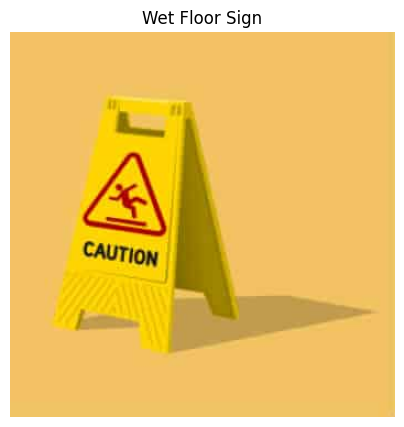

In [15]:
img_path = '/home/omar/State of The Art/Caution_wet_sign_detection_yolov8/dataset/Test/images/wet-floor-sign.jpg'

# Read the image using OpenCV
img = cv2.imread(img_path)

# Convert the image from BGR (OpenCV format) to RGB (Matplotlib format)
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# Plot the image using Matplotlib
plt.figure(figsize=(5, 5))
plt.imshow(img_rgb)
plt.axis('off')  # Hide the axis
plt.title("Wet Floor Sign")
plt.show()



In [21]:
results = model(img)
print(results)


0: 640x640 1 wet caution sign, 1811.3ms
Speed: 2.0ms preprocess, 1811.3ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)
[ultralytics.engine.results.Results object with attributes:

boxes: ultralytics.engine.results.Boxes object
keypoints: None
masks: None
names: {0: 'wet caution sign'}
obb: None
orig_img: array([[[101, 193, 244],
        [101, 193, 244],
        [101, 193, 244],
        ...,
        [100, 196, 236],
        [102, 199, 237],
        [103, 200, 238]],

       [[101, 193, 244],
        [101, 193, 244],
        [101, 193, 244],
        ...,
        [100, 196, 236],
        [102, 199, 237],
        [103, 200, 238]],

       [[101, 193, 244],
        [101, 193, 244],
        [101, 193, 244],
        ...,
        [100, 196, 236],
        [102, 199, 237],
        [103, 200, 238]],

       ...,

       [[101, 196, 240],
        [101, 196, 240],
        [101, 196, 240],
        ...,
        [108, 190, 232],
        [111, 193, 234],
        [120, 200, 241]],



In [25]:
for result in results:
    # detection
    result.boxes.xyxy   # box with xyxy format, (N, 4)
    result.boxes.xywh   # box with xywh format, (N, 4)
    result.boxes.xyxyn  # box with xyxy format but normalized, (N, 4)
    result.boxes.xywhn  # box with xywh format but normalized, (N, 4)
    result.boxes.conf   # confidence score, (N, 1)
    result.boxes.cls    # cls, (N, 1)

    # # segmentation
    # result.masks.masks     # masks, (N, H, W)
    # result.masks.segments  # bounding coordinates of masks, List[segment] * N

    # classification
    result.probs     # cls prob, (num_class, )

    print(result.boxes.xyxy)
    print(result.boxes.xywh)
    

tensor([[ 33.8424,  44.1649, 210.0674, 293.4043]])
tensor([[121.9549, 168.7846, 176.2250, 249.2394]])


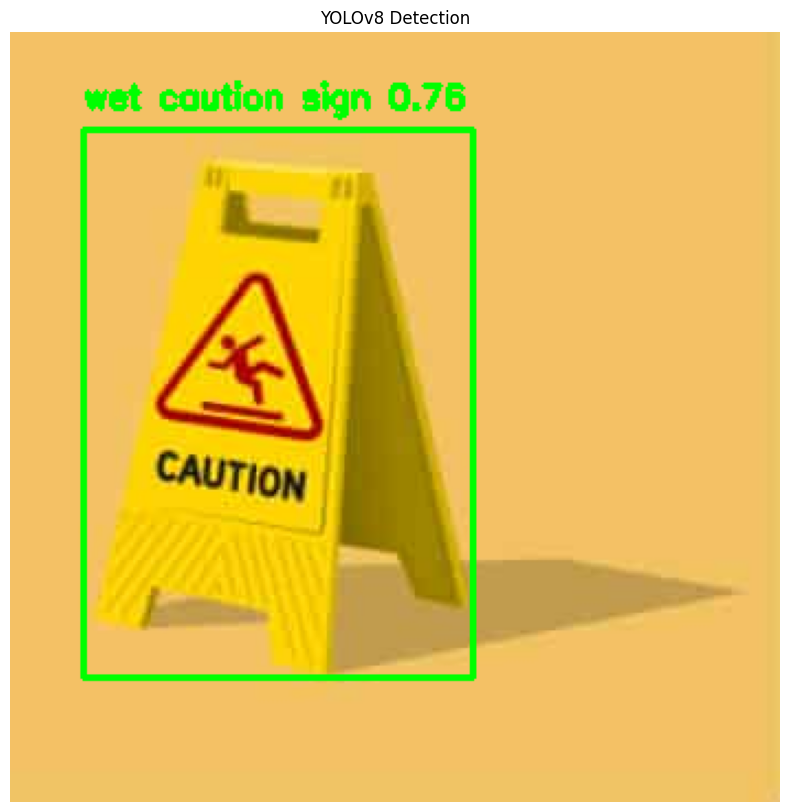

In [27]:
# Draw bounding boxes and labels on the image
for result in results:
    boxes = result.boxes.xyxy  # Extract the bounding boxes in xyxy format
    confidences = result.boxes.conf  # Extract the confidence scores
    class_ids = result.boxes.cls  # Extract the class IDs

    for box, confidence, class_id in zip(boxes, confidences, class_ids):
        x1, y1, x2, y2 = box
        label = f"{model.names[int(class_id)]} {confidence:.2f}"
        
        # Draw rectangle
        cv2.rectangle(img, (int(x1), int(y1)), (int(x2), int(y2)), (0, 255, 0), 2)
        # Draw label
        cv2.putText(img, label, (int(x1), int(y1)-10), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 255, 0), 2)

# Convert the image from BGR (OpenCV format) to RGB (Matplotlib format)
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# Plot the image with detections using Matplotlib
plt.figure(figsize=(10, 10))
plt.imshow(img_rgb)
plt.axis('off')  # Hide the axis
plt.title("YOLOv8 Detection")
plt.show()